# Kaggle Compeition Notebook

- Author: Muhammad Zeeshan
- Linkedin: https://www.linkedin.com/in/muhammad-zeeshan-ayaz/ 
- Github id: zeeshan-ayaz

# Survival Rate Predicted by Neural Network in Tensorflow

In [61]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
# import plotly.express as px
import matplotlib.pyplot as plt

In [62]:
# load the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
submission = pd.read_csv("gender_submission.csv")

In [63]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [64]:
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [65]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Let's explore teh data df_train.csv

In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
# find null values in percentage form
(df_train.isnull().sum()/len(df_train) *100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

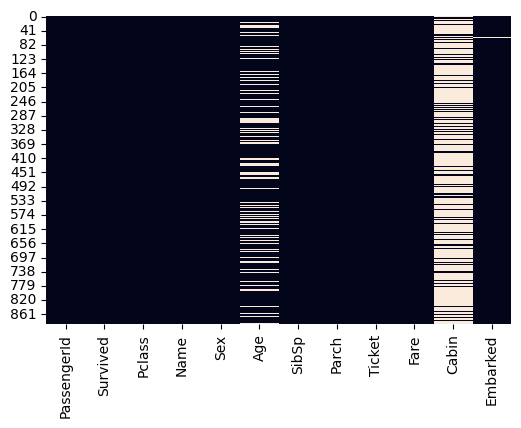

In [68]:
# plot the null values
plt.figure(figsize=(6, 4))
sns.heatmap(df_train.isnull(), cbar=False)
plt.show

In [69]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [70]:
df = df_train.copy()

In [71]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score



categorical_cols = ["Cabin", "Embarked"]
bool_cols = []
numerical_cols = ['Age']

missing_data_cols = df.isnull().sum()[df.isnull().sum()>0].index.tolist()

# create a function to impute missing values
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numerical_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass
        



Missing Values Age : 19.87%
MAE = 9.129544055944057 

RMSE = 11.510724292376432 

R2 = 0.2853626118564023 

Missing Values Cabin : 77.1%
The feature 'Cabin' has been imputed with 26.83 accuracy

Missing Values Embarked : 0.22%
The feature 'Embarked' has been imputed with 89.33 accuracy



In [72]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

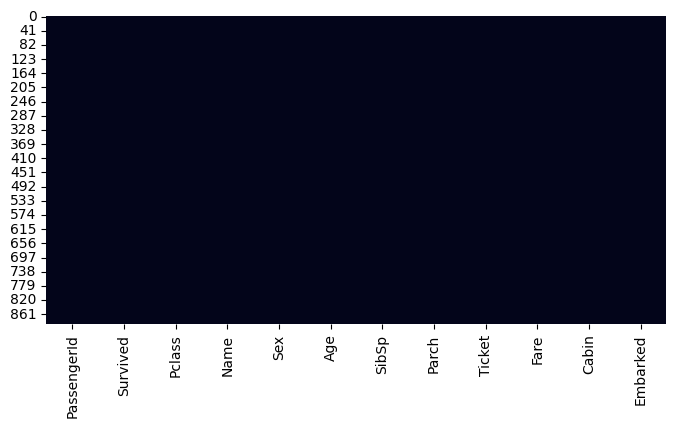

In [73]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Missing value has been imuted or removed from the data set

##  Machine Learning

Pre-process steps for machine Learning

In [74]:
# split the data into x  y 
X = df.drop(['Survived','Name'], axis=1)
y = df['Survived']

# encod the data
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype =='object' or X[col].dtype =='category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scalling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



## Logistic Regression Classifier

Confusion Matrix
[[90 15]
 [19 55]]
Accuracy: 0.81
Classification Report:  
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



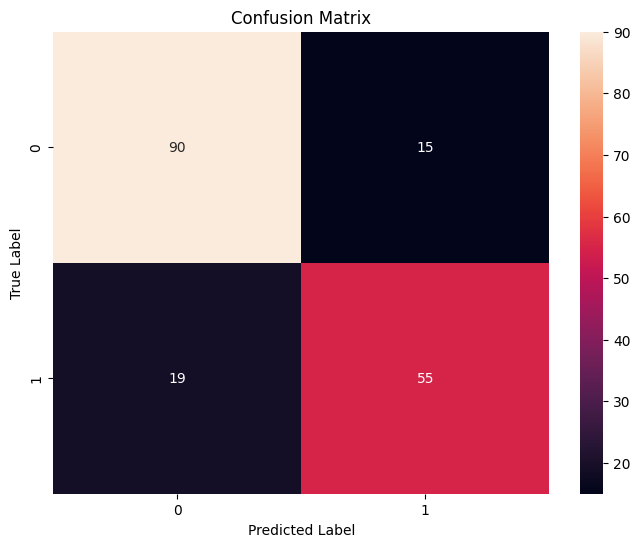

In [75]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# create logistic regression classifer
LG_classifier = LogisticRegression(random_state=42)
LG_classifier.fit(X_train, y_train)
LG_y_pred = LG_classifier.predict(X_test)

# Compute the confusion Matrix
LG_m = confusion_matrix(y_test, LG_y_pred)
print("Confusion Matrix")
print(LG_m)

# Compute the accuracy
LG_accuracy = accuracy_score(y_test, LG_y_pred)
print("Accuracy: {:.2f}".format(LG_accuracy))

# Compute the classification Report
LG_report = classification_report(y_test, LG_y_pred)
print("Classification Report:  ")
print(LG_report)

plt.figure(figsize=(8,6))
sns.heatmap(LG_m, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel('True Label')
plt.show()

## Decision Tree Classifier

Accuracy: 
0.7988826815642458
confusion matrix
[[92 13]
 [23 51]]
Classification Report :
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



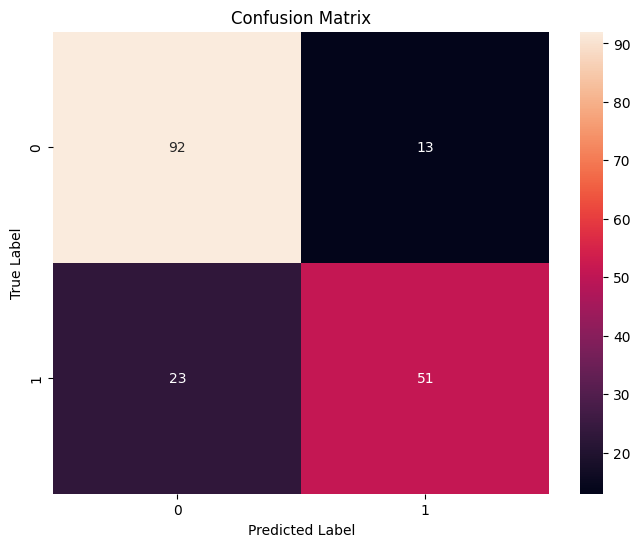

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the decision Tree Model
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth =  3, max_features=None)

# # Define the hyperparameters and the range of valuues to test
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [3,5,7,10, None],
#     # 'min_sample_split': [2,5,10],
#     # 'min_sample_leaf':[1,2,4],
#     'max_features': [None, 'auto', 'sqrt', 'log2']
# }

# Set up GridSearchCV
# grid_search = GridSearchCV(estimator=DT_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit GridSeachcv on the training data
# grid_search.fit(X_train, y_train)
DT_classifier.fit(X_train, y_train)
# Extract Best Parameters 
# best_params = grid_search.best_params_
# print("Best parameters: ", best_params)
# y_pred = grid_search.predict(X_test)
DT_y_pred = DT_classifier.predict(X_test)

# compute the best accuracy
DT_accuracy = accuracy_score(y_test, DT_y_pred)
print("Accuracy: ")
print(DT_accuracy)

# compute the confusion matrix
DT_matrix = confusion_matrix(y_test, DT_y_pred)
print("confusion matrix")
print(DT_matrix)

DT_report = classification_report(y_test, DT_y_pred)
print("Classification Report :")
print(DT_report)

plt.figure(figsize=(8,6))
sns.heatmap(DT_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel('True Label')
plt.show()

## Random Forest Classifier

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters: 
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': None}
Best Model Accuracy : 
0.8491620111731844
confusion_matrix: 
[[97  8]
 [19 55]]
Classification Report :
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       105
           1       0.87      0.74      0.80        74

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



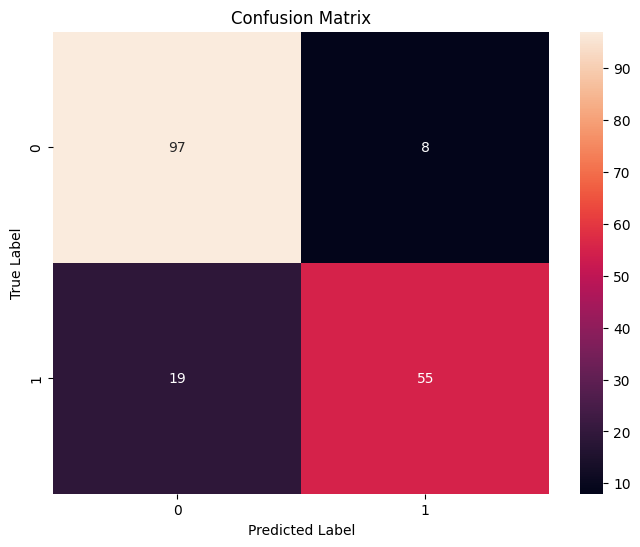

CPU times: total: 2.48 s
Wall time: 47.2 s


In [78]:
%%time
from sklearn.ensemble import RandomForestClassifier

# Define the RandomForestClassifier model
RF_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparamaters and teh range of values to test
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5,7,10, None],
    # 'min_sample_split': [2,5,10],
    # 'min_sample_leaf':[1,2,4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'bootstrap':[True, False]
}
# Set up the grid searchcv
grid_search = GridSearchCV(estimator=RF_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')


# fit the grid seach cv on training data
grid_search.fit(X_train, y_train)

# best parameters
best_params = grid_search.best_params_
print("Best Parameters: ")
print(best_params)

best_model = grid_search.best_estimator_
RF_y_pred = best_model.predict(X_test)

#compute the accuracy
RF_accuracy = accuracy_score(y_test, RF_y_pred)
print("Best Model Accuracy : ")
print(RF_accuracy)

#compute the confusion matrix
RF_matrix = confusion_matrix(y_test, RF_y_pred)
print('confusion_matrix: ')
print(RF_matrix)

RF_report = classification_report(y_test, RF_y_pred)
print("Classification Report :")
print(RF_report)

plt.figure(figsize=(8,6))
sns.heatmap(RF_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel('True Label')
plt.show()

## SVM

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: 
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy:  0.8268156424581006


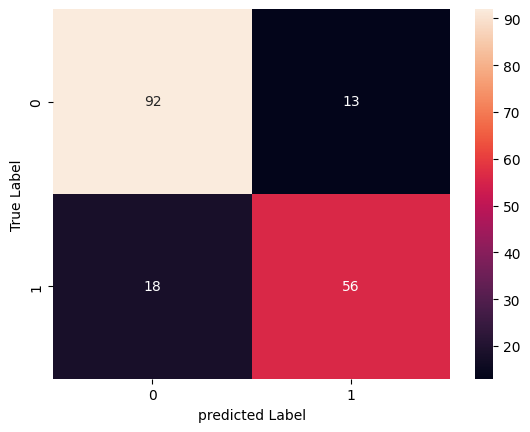

In [81]:
from sklearn.svm import SVC

# Define the model
SV_classifier = SVC()

# Define the hyperparameters and the range of values to test
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=SV_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# fit the model
grid_search.fit(X_train, y_train)

# best parameters
best_params = grid_search.best_params_
print("Best Parameters: ")
print(best_params)

SV_y_pred = grid_search.predict(X_test)
# # fit the model on trainning data
# SV_classifier.fit(X_train, y_train)
# SV_y_pred = SV_classifier.predict(X_test)

# compute the accuracy score
SV_accuracy = accuracy_score(y_test, SV_y_pred)
print("Accuracy: ", SV_accuracy)

# plot confusion matrix
SV_m = confusion_matrix(y_test, SV_y_pred)
plt.Figure(figsize=(8, 5))
sns.heatmap(SV_m, annot=True, fmt='d')
plt.xlabel("predicted Label")
plt.ylabel("True Label")
plt.show()

## Classifier Accuracy Comparion

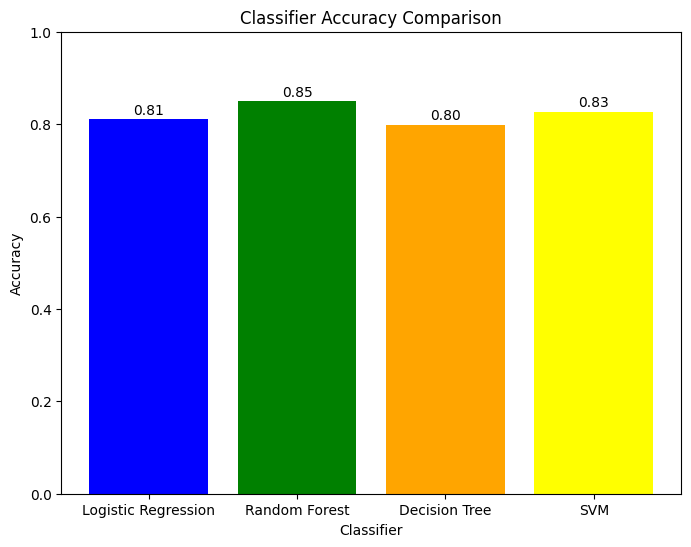

In [86]:
# Classifier names
classifier = ["Logistic Regression", "Random Forest", "Decision Tree", "SVM" ]

# Corressponding Accuracy
accuracies = [LG_accuracy, RF_accuracy, DT_accuracy, SV_accuracy ]

# Ploting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(classifier, accuracies, color = ['blue', 'green', 'orange', 'yellow'])
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Classifier Accuracy Comparison")
plt.ylim(0, 1)

# Annotating each bar with its corresponding accuracy value
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", color = 'black', ha = 'center', va = 'center')

plt.show()

## Create a neural network for Binary Classification

In [ ]:
# import tensorflow library
import tensorflow as tf

# building the mode
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape = (X_train.shape[1],)), # Input layer

    tf.keras.layers.Dense(16, activation='relu'), # Hidden Layer

    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
])

# compile the model
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
model.evaluate(X_test, y_test)